In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

In [19]:
data = pd.read_csv("../csv/resumen_nacional.csv")
data_pacientes_en_uci = pd.read_csv("../csv/pacientes_en_uci.csv")

In [20]:
data_pacientes_en_uci

,codigo,region,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,...,05/15/2020,05/16/2020,05/17/2020,05/18/2020,05/19/2020,05/20/2020,05/21/2020,05/22/2020,05/23/2020,05/24/2020
0,15,Arica y Parinacota,0,0,0,0,2,4,4,5,...,7,8,8,8,8,7,7,8,9,8
1,1,Tarapacá,1,1,1,1,1,2,2,2,...,13,13,12,16,18,18,21,18,17,17
2,2,Antofagasta,3,4,3,3,3,3,2,2,...,41,45,49,47,50,50,50,44,44,46
3,3,Atacama,0,0,0,0,0,0,0,1,...,3,3,3,3,3,3,3,3,3,3
4,4,Coquimbo,1,1,1,2,1,1,2,1,...,2,1,1,1,1,0,1,3,3,4
5,5,Valparaíso,14,17,18,22,27,22,21,20,...,25,26,27,32,34,38,38,37,46,50
6,13,Metropolitana,83,90,107,129,146,161,160,174,...,551,581,595,620,682,705,730,771,832,851
7,6,O’Higgins,5,5,5,5,5,6,6,6,...,7,10,10,9,9,14,18,22,24,26
8,7,Maule,3,3,3,3,4,5,7,8,...,6,8,8,8,8,8,10,16,15,18
9,16,Ñuble,7,8,10,11,10,11,13,13,...,5,5,5,5,7,7,8,9,10,9


In [3]:
data.tail()

,dia,confirmados,muertes
74,05/20/2020,53617,544
75,05/21/2020,57581,589
76,05/22/2020,61857,630
77,05/23/2020,65393,673
78,05/24/2020,69102,718


In [35]:
n = data["confirmados"].count()-1

print("Total de Confirmados ", data["dia"][n], " = ", data["confirmados"][n] )
print("Total de Fallecidos al ", data["dia"][n], " = ", data["muertes"][n])

confirmados_ultimas_24h = data["confirmados"][n] - data["confirmados"][n-1]
print("Confirmados ultimas 24h = ", confirmados_ultimas_24h )

muertes_ultimas_24h = data["muertes"][n] - data["muertes"][n-1]
print("Fallecidos ultimas 24h = ", muertes_ultimas_24h )



Total de Confirmados  05/24/2020  =  69102
Total de Fallecidos al  05/24/2020  =  718
Confirmados ultimas 24h =  3709
Fallecidos ultimas 24h =  45


In [32]:
data.describe()

,confirmados,muertes
count,79.000000,79.000000
mean,14821.392405,162.860759
std,17554.561215,184.646907
min,7.000000,0.000000
25%,1458.000000,4.500000
50%,8273.000000,94.000000
75%,21329.500000,272.500000
max,69102.000000,718.000000


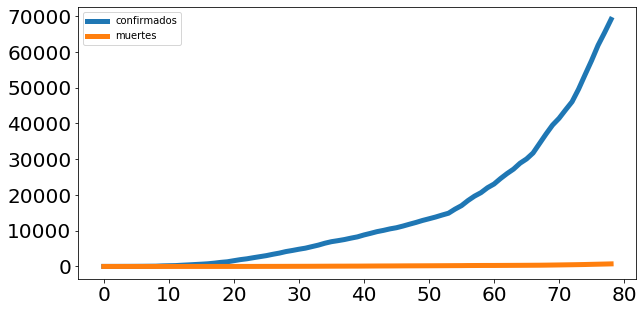

In [5]:
#data.plot(kind="line", x="dia" , y= ["confirmados", "muertes"], figsize = (10,5) )
data.plot(figsize=(10,5), linewidth=5, fontsize=20 )

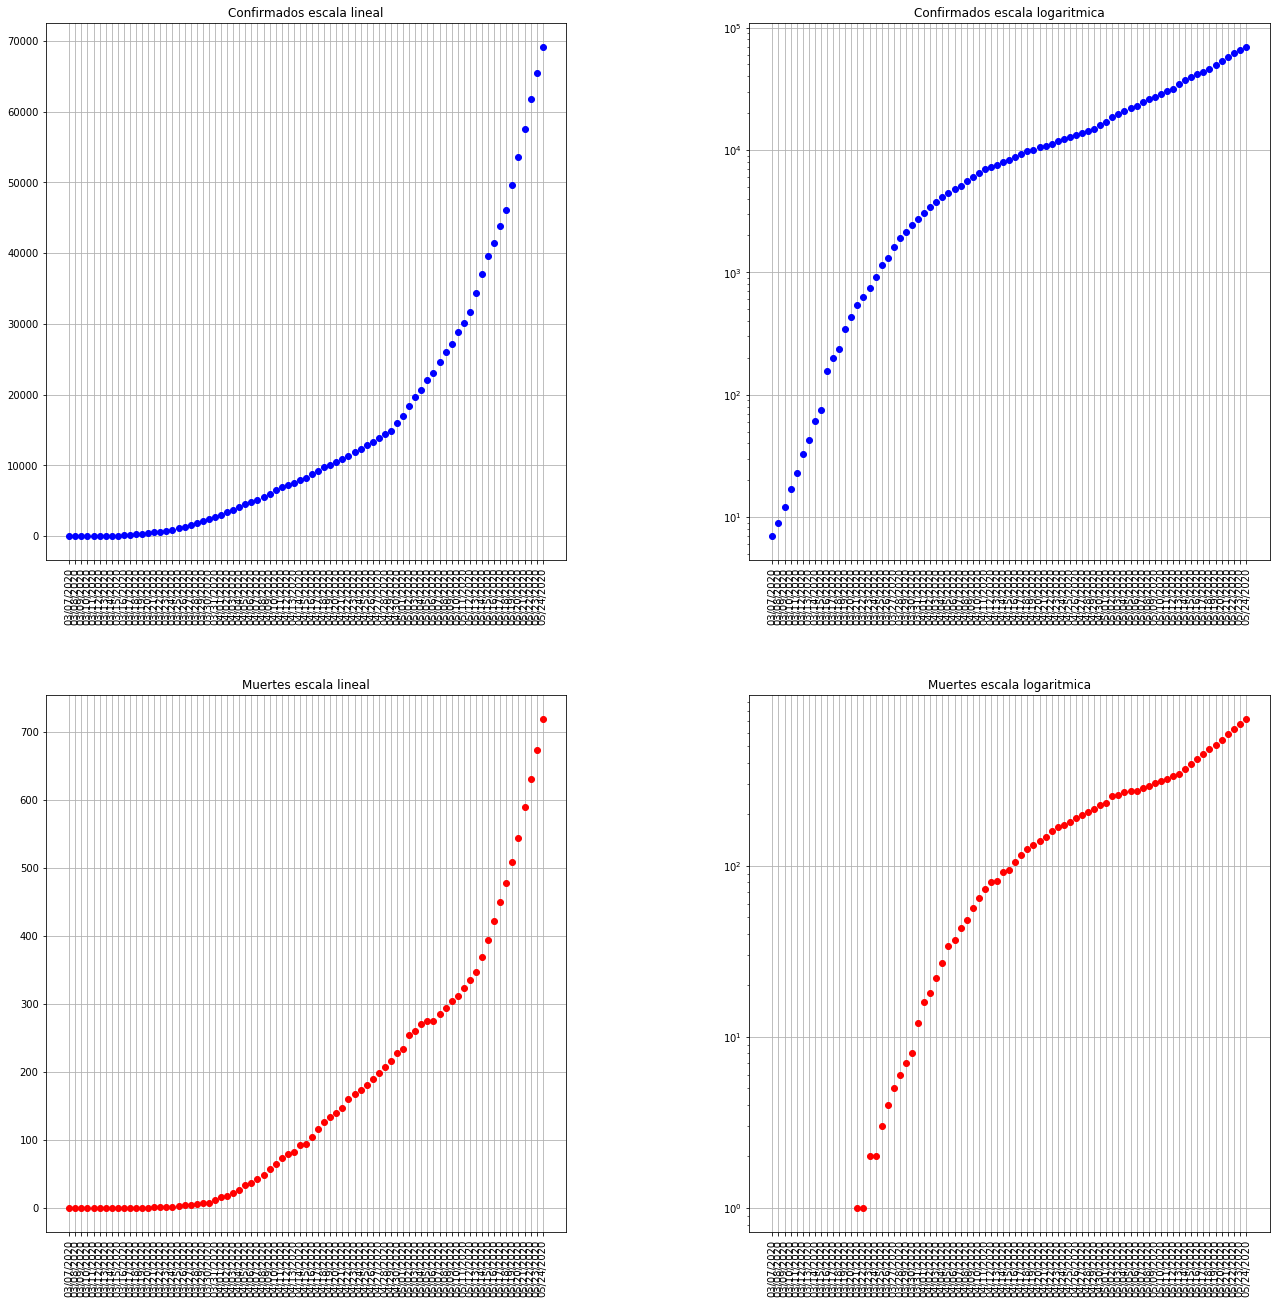

In [6]:
plt.figure(figsize= [20, 20])

plt.subplot(221)
#data.plot( x="dia", y="confirmados" )
plt.plot(data["dia"], data["confirmados"], 'bo', linewidth=5)
plt.title('Confirmados escala lineal')
plt.grid(True)
plt.xticks(rotation=90)

plt.subplot(222)
#data.plot( x="dia", y="confirmados" )
plt.plot(data["dia"], data["confirmados"], 'bo', linewidth=5)
plt.yscale('log')
plt.title('Confirmados escala logaritmica')
plt.grid(True)
plt.xticks(rotation=90)

plt.subplot(223)
#data.plot( x="dia", y="muertes" )
plt.plot(data["dia"], data["muertes"], 'ro', linewidth=5 )
plt.title('Muertes escala lineal')
plt.grid(True)
plt.xticks(rotation=90)

plt.subplot(224)
#data.plot( x="dia", y="muertes" )
plt.plot(data["dia"], data["muertes"], 'ro', linewidth=5 )
plt.yscale('log')
plt.title('Muertes escala logaritmica')
plt.grid(True)
plt.xticks(rotation=90)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()



In [7]:
#figure , axes = plt.subplots(2, sharex=True)
#data.plot(x="dia", y="confirmados", ax=axes[0], figsize=(15,15) , grid=True)
#data.plot(x="dia", y="muertes" , ax=axes[1], figsize=(15,15), color="r" , grid=True)